## World Bank Project

#### Importing libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Import libraries for running ANOVA and post-hoc test
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#### Loading and Merging data

In [47]:
df1=pd.read_csv("world_bank_development_indicators.csv")
df2=pd.read_excel("income.xlsx")
df = pd.merge(df1, df2, left_on='country', right_on='Economy', how="inner")

#### Data Inspection

In [48]:
df.head()

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,Economy,Code,Region,Income group,Lending category
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8622466.0,7898093.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA
1,Afghanistan,1961-01-01,57.878356,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,8790140.0,8026804.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA
2,Afghanistan,1962-01-01,57.955016,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,8969047.0,8163985.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA
3,Afghanistan,1963-01-01,58.031676,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,9157465.0,8308019.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA
4,Afghanistan,1964-01-01,58.116002,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,9355514.0,8458694.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA


In [49]:
df.sample(8)

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,Economy,Code,Region,Income group,Lending category
9241,"Macao SAR, China",2020-01-01,NaN,NaN,3.290000e+01,NaN,57.917611,0.770510,0.226567,100.000000,...,6.762830e+05,0.000000e+00,-0.290055,0.263182,0.295734,"Macao SAR, China",MAC,East Asia & Pacific,High income,NaN
8971,Low & middle income,2006-01-01,37.254967,32.420449,9.350336e+07,NaN,9.404588,NaN,NaN,77.579831,...,5.462498e+09,3.091828e+09,NaN,NaN,NaN,Low & middle income,LMY,NaN,NaN,NaN
15206,Uganda,2002-01-01,64.120915,15.416866,1.998100e+05,1180.0,11.859464,-1.025739,0.204138,7.800000,...,2.554509e+07,2.155341e+07,-0.930504,0.159146,NaN,Uganda,UGA,Sub-Saharan Africa,Low income,IDA
10786,New Zealand,1965-01-01,50.328510,NaN,2.633100e+05,1732.0,NaN,NaN,NaN,NaN,...,2.628400e+06,5.548290e+05,NaN,NaN,NaN,New Zealand,NZL,East Asia & Pacific,High income,NaN
11682,Panama,1965-01-01,22.302932,NaN,7.434000e+04,2928.0,NaN,NaN,NaN,NaN,...,1.310556e+06,7.282630e+05,NaN,NaN,NaN,Panama,PAN,Latin America & Caribbean,High income,IBRD
6677,IDA blend,1983-01-01,38.670223,NaN,3.943970e+06,NaN,5.858639,NaN,NaN,NaN,...,2.303524e+08,1.678716e+08,NaN,NaN,NaN,IDA blend,IDB,NaN,NaN,NaN
2302,Cabo Verde,2022-01-01,NaN,NaN,NaN,NaN,36.825407,0.983123,0.202525,NaN,...,5.931490e+05,1.925070e+05,0.935108,0.142643,NaN,Cabo Verde,CPV,Sub-Saharan Africa,Upper middle income,Blend
10527,Nauru,1962-01-01,15.000000,NaN,2.000000e+01,NaN,NaN,NaN,NaN,NaN,...,4.950000e+03,0.000000e+00,NaN,NaN,NaN,Nauru,NRU,East Asia & Pacific,High income,IBRD


In [50]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16219 entries, 0 to 16218
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    16219 non-null  object 
 1   date                                       16219 non-null  object 
 2   agricultural_land%                         13921 non-null  float64
 3   forest_land%                               7751 non-null   float64
 4   land_area                                  14126 non-null  float64
 5   avg_precipitation                          9726 non-null   float64
 6   trade_in_services%                         8776 non-null   float64
 7   control_of_corruption_estimate             4639 non-null   float64
 8   control_of_corruption_std                  4639 non-null   float64
 9   access_to_electricity%                     6989 non-null   float64
 10  renewvable_energy_cons

In [51]:
# Dataset Shape
print("Dataset Shape:", df.shape)

Dataset Shape: (16219, 55)


In [52]:
# columns in the dataset 
print("Columns in the dataset:")
for col in df.columns:
    print(col)

Columns in the dataset:
country
date
agricultural_land%
forest_land%
land_area
avg_precipitation
trade_in_services%
control_of_corruption_estimate
control_of_corruption_std
access_to_electricity%
renewvable_energy_consumption%
electric_power_consumption
CO2_emisions
other_greenhouse_emisions
population_density
inflation_annual%
real_interest_rate
risk_premium_on_lending
research_and_development_expenditure%
central_goverment_debt%
tax_revenue%
expense%
goverment_effectiveness_estimate
goverment_effectiveness_std
human_capital_index
doing_business
time_to_get_operation_license
statistical_performance_indicators
individuals_using_internet%
logistic_performance_index
military_expenditure%
GDP_current_US
political_stability_estimate
political_stability_std
rule_of_law_estimate
rule_of_law_std
regulatory_quality_estimate
regulatory_quality_std
government_expenditure_on_education%
government_health_expenditure%
multidimensional_poverty_headcount_ratio%
gini_index
birth_rate
death_rate
life_e

In [53]:
# percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
country                                       0.000000
date                                          0.000000
agricultural_land%                           14.168568
forest_land%                                 52.210371
land_area                                    12.904618
avg_precipitation                            40.033294
trade_in_services%                           45.890622
control_of_corruption_estimate               71.397743
control_of_corruption_std                    71.397743
access_to_electricity%                       56.908564
renewvable_energy_consumption%               52.900919
electric_power_consumption                   54.904741
CO2_emisions                                 56.618780
other_greenhouse_emisions                    56.618780
population_density                           13.083421
inflation_annual%                            36.796350
real_interest_rate                           73.235095
risk_premium_on_lend

In [54]:
# Checking for missing values
df.isnull().sum()

country                                          0
date                                             0
agricultural_land%                            2298
forest_land%                                  8468
land_area                                     2093
avg_precipitation                             6493
trade_in_services%                            7443
control_of_corruption_estimate               11580
control_of_corruption_std                    11580
access_to_electricity%                        9230
renewvable_energy_consumption%                8580
electric_power_consumption                    8905
CO2_emisions                                  9183
other_greenhouse_emisions                     9183
population_density                            2122
inflation_annual%                             5968
real_interest_rate                           11878
risk_premium_on_lending                      13869
research_and_development_expenditure%        13447
central_goverment_debt%        

In [55]:
# decribe the dataset
df.describe()

,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
count,13921.000000,7751.000000,1.412600e+04,9726.000000,8776.000000,4639.000000,4639.000000,6989.000000,7639.000000,7314.000000,...,433.000000,2075.000000,15169.000000,15151.000000,15003.000000,1.578300e+04,1.565700e+04,4706.000000,4706.000000,4103.000000
mean,36.769780,32.727641,4.927244e+06,1201.597779,21.381320,-0.012059,0.203455,80.623744,31.097157,2980.947331,...,26.855810,37.786795,28.035763,10.488044,64.347022,2.125386e+08,1.215267e+08,-0.004632,0.167190,7.964641
std,20.806880,23.513946,1.429803e+07,801.490248,23.592171,1.004910,0.087821,28.955287,29.813651,4195.312605,...,10.706123,8.893234,12.883225,5.381069,11.157735,7.227470e+08,4.153242e+08,0.995756,0.064463,12.079899
min,0.262821,0.000000,2.027000e+00,18.100000,0.621025,-1.936706,0.114062,0.533899,0.000000,5.548906,...,2.370000,20.700000,5.000000,0.795000,11.995000,2.646000e+03,0.000000e+00,-2.313395,0.102437,0.000000
25%,19.797589,12.543726,2.072000e+04,589.000000,8.764372,-0.791940,0.148039,68.321813,5.305000,380.483549,...,18.500000,31.200000,16.222842,7.000000,56.994500,9.005955e+05,4.176150e+05,-0.823601,0.126576,1.323974
50%,37.470223,31.101989,1.998100e+05,1083.000000,13.688930,-0.243968,0.172068,98.556229,21.117526,1394.407738,...,24.800000,35.600000,26.900000,9.201780,66.883000,6.250510e+06,2.919496e+06,0.032819,0.142200,3.327091
75%,50.738916,47.498275,1.246700e+06,1738.000000,25.388801,0.695926,0.226898,100.000000,53.537515,4027.279627,...,32.600000,43.300000,39.576000,12.400000,72.633219,3.706793e+07,1.649997e+07,0.905235,0.196929,9.208205
max,93.440750,98.574551,1.299507e+08,3240.000000,327.166162,2.459118,0.942502,100.000000,98.340000,54799.174708,...,74.200000,65.800000,58.121000,103.534000,85.497561,7.950947e+09,3.435260e+09,1.800992,0.578548,138.773986


In [56]:
# describe the dataset object type
df.describe(include=['object'])

,country,date,Economy,Code,Region,Income group,Lending category
count,16219,16219,16219,16219,13471,13343,8991
unique,256,64,256,256,7,4,3
top,Afghanistan,1992-01-01,Afghanistan,AFG,Europe & Central Asia,High income,IBRD
freq,64,256,64,64,3648,5376,4191


In [57]:
# unique and number of unique values in country and Income group column and years
print("Number of Unique countries:", df['country'].nunique())
print("Number of Unique Years:", df['date'].nunique())
print("Number of  Unique Groups:", df['Income group'].nunique())
print("Countries:", df['country'].unique())
print("Groups:", df['Income group'].unique())
print("Years:", df['date'].unique())

Number of Unique countries: 256
Number of Unique Years: 64
Number of  Unique Groups: 4
Countries: ['Afghanistan' 'Africa Eastern and Southern' 'Africa Western and Central'
 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Arab World' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Caribbean small states' 'Cayman Islands' 'Central African Republic'
 'Central Europe and the Baltics' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (ID

In [58]:
# duplicated rows in the dataset
df.duplicated().sum()

np.int64(0)

In [59]:
# number of entries for each income group
df['Income group'].value_counts()

Income group
High income            5376
Upper middle income    3392
Lower middle income    3039
Low income             1536
Name: count, dtype: int64

#### Data Cleaning 

In [60]:
df['Region'].value_counts()

Region
Europe & Central Asia                                3648
Sub-Saharan Africa                                   2880
Latin America & Caribbean                            2560
East Asia & Pacific                                  2335
Middle East, North Africa, Afghanistan & Pakistan    1472
South Asia                                            384
North America                                         192
Name: count, dtype: int64

In [61]:
# Map World Bank regions to continents
region_to_continent = {
    'Europe & Central Asia': 'Europe',
    'Sub-Saharan Africa': 'Africa',
    'Latin America & Caribbean': 'South America',
    'East Asia & Pacific': 'Asia',
    'Middle East, North Africa, Afghanistan & Pakistan': 'Asia',
    'South Asia': 'Asia',
    'North America': 'North America'
}

df['continent'] = df['Region'].map(region_to_continent)

In [62]:
print(df['continent'].unique())
print(df['continent'].value_counts())

['Asia' nan 'Europe' 'Africa' 'South America' 'North America']
continent
Asia             4191
Europe           3648
Africa           2880
South America    2560
North America     192
Name: count, dtype: int64


In [63]:
# countries names in country column edited to remove leading and trailing spaces
df['country'] = df['country'].str.strip()

In [64]:
df['country'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Early-demographic div

In [65]:
# rename dictionary for standardizing country names
rename_dict = {
    'Swaziland': 'Eswatini',
    'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
    'Congo, Rep.': 'Republic of the Congo',
    'Russian Federation': 'Russia',
    'Syrian Arab Republic': 'Syria',
    'Iran, Islamic Rep.': 'Iran',
    'Egypt, Arab Rep.': 'Egypt',
    'Bahamas, The': 'Bahamas',
    'Gambia, The': 'Gambia',
    'Venezuela, RB': 'Venezuela',
    "Korea, Dem. People's Rep.": 'North Korea',
    "Korea, Rep.": 'South Korea',
    "Hong Kong SAR, China": 'Hong Kong',
    "Macao SAR, China": 'Macau',
    "Sint Maarten (Dutch part)": 'Sint Maarten',
    "Virgin Islands (U.S.)": 'U.S. Virgin Islands',
    "Lao PDR": 'Laos',
    "Brunei Darussalam": 'Brunei',
    "Slovak Republic": 'Slovakia',
    "Kyrgyz Republic": 'Kyrgyzstan',
    "Micronesia, Fed. Sts.": 'Micronesia',
    "Yemen, Rep.": 'Yemen',
    "St. Kitts and Nevis": "Saint Kitts and Nevis",
    "St. Lucia": "Saint Lucia",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "St. Martin (French part)": np.nan,
}

# exclude keywords list for filtering out non-country entries
exclude_keywords = [
    'income', 'ida', 'ibrd', 'small states', 'world', 'euro area', 'oecd',
    'demographic dividend', 'fragile', 'post-', 'pre-', 'early-', 'late-',
    'sub-saharan africa', 'east asia & pacific', 'latin america & caribbean',
    'north america', 'africa eastern', 'africa western',
    'central europe and the baltics', 'europe & central asia',
    'middle east & north africa', 'high income', 'low income',
    'upper middle income', 'lower middle income'
]

non_countries = [
    # Territories / Dependencies
     'American Samoa', 'Aruba', 'Bermuda', 'British Virgin Islands',
    'Cayman Islands', 'Channel Islands', 'Faroe Islands', 'French Polynesia',
    'Gibraltar', 'Greenland', 'Guam', 'Isle of Man', 'Monaco',
    'New Caledonia', 'Northern Mariana Islands', 'Turks and Caicos Islands',
    'U.S. Virgin Islands',

    # Regions (World Bank aggregates)
    'World', 'European Union', 'Arab World', 'South Asia',
    'Middle East & North Africa',
    'Heavily indebted poor countries (HIPC)',
    'Least developed countries: UN classification',
    'Caribbean small states', 'Pacific island small states',
    'IDA & IBRD total', 'IDA total', 'IBRD only'
]

def clean_country(name):
    if not isinstance(name, str):
        return np.nan
    for word in exclude_keywords:
        if word.lower() in name.lower():
            return np.nan
    if name in non_countries:
        return np.nan
    return rename_dict.get(name, name)

df['country_clean'] = df['country'].apply(clean_country)

print(df['country_clean'].unique())



['Afghanistan' nan 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Democratic Republic of the Congo' 'Republic of the Congo' 'Costa Rica'
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 

In [66]:
# rename the cleaned country column to country and drop the old country column as well as region column
df['country'] = df['country_clean']
df = df.drop(columns=['country_clean'])
df = df.drop(columns=['Region'])
df['country'].unique()

array(['Afghanistan', nan, 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Democratic Republic of the Congo', 'Republic of the Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', '

In [67]:
df['Income group'] = (df['Income group'].str.replace(' income', '').str.replace(' ', '_'))

In [68]:
# Edit columns names 
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
#change % in column names to _percent
df.columns = [col.replace('%', '_percent') for col in df.columns]
df.columns

Index(['country', 'date', 'agricultural_land_percent', 'forest_land_percent',
       'land_area', 'avg_precipitation', 'trade_in_services_percent',
       'control_of_corruption_estimate', 'control_of_corruption_std',
       'access_to_electricity_percent',
       'renewvable_energy_consumption_percent', 'electric_power_consumption',
       'co2_emisions', 'other_greenhouse_emisions', 'population_density',
       'inflation_annual_percent', 'real_interest_rate',
       'risk_premium_on_lending',
       'research_and_development_expenditure_percent',
       'central_goverment_debt_percent', 'tax_revenue_percent',
       'expense_percent', 'goverment_effectiveness_estimate',
       'goverment_effectiveness_std', 'human_capital_index', 'doing_business',
       'time_to_get_operation_license', 'statistical_performance_indicators',
       'individuals_using_internet_percent', 'logistic_performance_index',
       'military_expenditure_percent', 'gdp_current_us',
       'political_stability_e

In [69]:
df.sample(5)

,country,date,agricultural_land_percent,forest_land_percent,land_area,avg_precipitation,trade_in_services_percent,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity_percent,...,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,economy,code,income_group,lending_category,continent
9478,Maldives,2001-01-01,33.333333,2.733333,300.0,1972.0,53.316208,NaN,NaN,87.457672,...,287324.0,204405.0,NaN,NaN,2.436278,Maldives,MDV,Upper_middle,IDA,Asia
11698,Panama,1981-01-01,25.316115,NaN,74340.0,2928.0,30.725211,NaN,NaN,NaN,...,2003092.0,985802.0,NaN,NaN,NaN,Panama,PAN,High,IBRD,South America
3781,Dominican Republic,1965-01-01,46.574208,NaN,48310.0,1410.0,NaN,NaN,NaN,NaN,...,3868712.0,2512651.0,NaN,NaN,NaN,Dominican Republic,DOM,Upper_middle,IBRD,South America
7825,North Korea,1979-01-01,20.181048,NaN,120410.0,1054.0,NaN,NaN,NaN,NaN,...,17719172.0,7644051.0,NaN,NaN,NaN,"Korea, Dem. People's Rep.",PRK,Low,NaN,Asia
5908,Guatemala,1982-01-01,28.966032,NaN,107160.0,1996.0,5.156591,NaN,NaN,NaN,...,7262658.0,4403350.0,NaN,NaN,NaN,Guatemala,GTM,Upper_middle,IBRD,South America


In [70]:
df.columns

Index(['country', 'date', 'agricultural_land_percent', 'forest_land_percent',
       'land_area', 'avg_precipitation', 'trade_in_services_percent',
       'control_of_corruption_estimate', 'control_of_corruption_std',
       'access_to_electricity_percent',
       'renewvable_energy_consumption_percent', 'electric_power_consumption',
       'co2_emisions', 'other_greenhouse_emisions', 'population_density',
       'inflation_annual_percent', 'real_interest_rate',
       'risk_premium_on_lending',
       'research_and_development_expenditure_percent',
       'central_goverment_debt_percent', 'tax_revenue_percent',
       'expense_percent', 'goverment_effectiveness_estimate',
       'goverment_effectiveness_std', 'human_capital_index', 'doing_business',
       'time_to_get_operation_license', 'statistical_performance_indicators',
       'individuals_using_internet_percent', 'logistic_performance_index',
       'military_expenditure_percent', 'gdp_current_us',
       'political_stability_e

In [71]:
# edit the data types of date column, income_group column and continent column
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Convert 'income_group' and 'continent' to categorical
df['income_group'] = df['income_group'].astype('category')
df['continent'] = df['continent'].astype('category')

# Check the data types
print(df.dtypes)

country                                                     object
date                                                datetime64[ns]
agricultural_land_percent                                  float64
forest_land_percent                                        float64
land_area                                                  float64
avg_precipitation                                          float64
trade_in_services_percent                                  float64
control_of_corruption_estimate                             float64
control_of_corruption_std                                  float64
access_to_electricity_percent                              float64
renewvable_energy_consumption_percent                      float64
electric_power_consumption                                 float64
co2_emisions                                               float64
other_greenhouse_emisions                                  float64
population_density                                         flo

In [72]:
#we need to have independent samples for ANOVA test so we should have one entry per country
# Filter years 2015–2019 
df_filtered = df[(df['date'].dt.year >= 2015) & (df['date'].dt.year <= 2019)]

#Separate numeric and non-numeric columns 
numeric_cols = df_filtered.select_dtypes(include=np.number).columns.tolist()
non_numeric_cols = df_filtered.select_dtypes(exclude=np.number).columns.tolist()
non_numeric_cols = [col for col in non_numeric_cols if col != 'country']

# Function to take mode (most frequent value) we will use it for non numerical columns
def mode_or_first(series):
    m = series.mode()
    if not m.empty:
        return m[0]
    else:
        return series.iloc[0]  # fallback if all missing

#Group by country and aggregate
# numeric → mean
agg_dict = {col: 'mean' for col in numeric_cols}
# categorical → mode
agg_dict.update({col: mode_or_first for col in non_numeric_cols})

df_filtered = df_filtered.groupby('country', as_index=False).agg(agg_dict)

df_filtered.head()


,country,agricultural_land_percent,forest_land_percent,land_area,avg_precipitation,trade_in_services_percent,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity_percent,renewvable_energy_consumption_percent,...,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,date,economy,code,income_group,lending_category,continent
0,Afghanistan,58.184996,1.852782,652230.0,327.0,9.986544,-1.469776,0.159634,91.606176,18.626,...,26674226.4,-1.031957,0.131337,7.478469,2015-01-01,Afghanistan,AFG,Low,IDA,Asia
1,Albania,42.907752,28.796131,27400.0,1485.0,38.289995,-0.521297,0.135974,99.952000,38.562,...,1166634.2,0.172499,0.124701,2.306497,2015-01-01,Albania,ALB,Upper_middle,IBRD,Europe
2,Algeria,17.366008,0.816546,2381741.0,89.0,8.482358,-0.645111,0.157602,99.491530,0.126,...,11492657.4,-0.932110,0.126153,1.313644,2015-01-01,Algeria,DZA,Upper_middle,IBRD,Asia
3,Andorra,40.035787,34.042553,470.0,NaN,87.579553,1.167777,0.409469,100.000000,18.936,...,8753.0,1.137696,0.233116,0.000000,2015-01-01,Andorra,AND,High,NaN,Europe
4,Angola,36.745649,54.762626,1246700.0,1010.0,18.290759,-1.322533,0.160244,43.523031,52.690,...,10616735.2,-1.021701,0.124524,4.280242,2015-01-01,Angola,AGO,Lower_middle,IBRD,Africa


In [73]:
# missing values summary
missing_counts = df_filtered.isnull().sum()
missing_pct = df_filtered.isnull().mean() * 100

# create missing report dataframe
missing_report = (
    pd.DataFrame({'missing_count': missing_counts, 'missing_pct': missing_pct})
    .sort_values('missing_pct', ascending=False)
)

print(missing_report)

                                                  missing_count  missing_pct
electric_power_consumption                                  192    99.481865
multidimensional_poverty_headcount_ratio_percent            136    70.466321
risk_premium_on_lending                                     122    63.212435
central_goverment_debt_percent                              121    62.694301
time_to_get_operation_license                               117    60.621762
research_and_development_expenditure_percent                 80    41.450777
gini_index                                                   66    34.196891
real_interest_rate                                           63    32.642487
lending_category                                             53    27.461140
expense_percent                                              53    27.461140
tax_revenue_percent                                          53    27.461140
intentional_homicides                                        45    23.316062

In [74]:
# columns to drop
cols_to_drop = [
    #missing value >30%
    'electric_power_consumption',                       #99%
    'multidimensional_poverty_headcount_ratio_percent', #77%
    'risk_premium_on_lending',                          #71%
    'time_to_get_operation_license',                    #70%
    'central_goverment_debt_percent',                   #68%
    'gini_index',                                       #50
    'real_interest_rate',                               #48%
    'research_and_development_expenditure_percent'  ,   #45%
    'lending_category',                                 #44%
    'human_capital_index',                              #36%
    'expense_percent',                                  #36%
    'tax_revenue_percent',                              #34%
    'avg_precipitation',                                #31%  

    # irrelevant Indicators
    'date',
    'population_density',
    'rural_population',
    'regulatory_quality_estimate',
    'logistic_performance_index', 
    'other_greenhouse_emisions', 
    'military_expenditure_percent', 
    'code', 
    'statistical_performance_indicators',

    #std columns
    'voice_and_accountability_std',
    'political_stability_std',
    'rule_of_law_std',
    'regulatory_quality_std',
    'goverment_effectiveness_std',
    'control_of_corruption_std',

    #redundant columns
    'economy',  # duplicate of country
    'land_area',
    'birth_rate',# have high correlation with life_expectancy_at_birth                
    'death_rate',# have high correlation with life_expectancy_at_birth
]
df_filtered = df_filtered.drop(columns=cols_to_drop)

#### Data Inspection & Visualiztion

In [75]:
df_filtered.head()

,country,agricultural_land_percent,forest_land_percent,trade_in_services_percent,control_of_corruption_estimate,access_to_electricity_percent,renewvable_energy_consumption_percent,co2_emisions,inflation_annual_percent,goverment_effectiveness_estimate,...,political_stability_estimate,rule_of_law_estimate,government_expenditure_on_education_percent,government_health_expenditure_percent,life_expectancy_at_birth,population,voice_and_accountability_estimate,intentional_homicides,income_group,continent
0,Afghanistan,58.184996,1.852782,9.986544,-1.469776,91.606176,18.626,10317.3020,2.325331,-1.419074,...,-2.685085,-1.609912,4.047653,0.563078,63.0914,35697881.4,-1.031957,7.478469,Low,Asia
1,Albania,42.907752,28.796131,38.289995,-0.521297,99.952000,38.562,5016.6600,1.719483,0.035061,...,0.305910,-0.378538,3.616193,2.780139,79.0034,2870165.6,0.172499,2.306497,Upper_middle,Europe
2,Algeria,17.366008,0.816546,8.482358,-0.645111,99.491530,0.126,160749.6400,4.599003,-0.493585,...,-1.001619,-0.890771,6.814119,4.331114,75.9274,41130280.8,-0.932110,1.313644,Upper_middle,Asia
3,Andorra,40.035787,34.042553,87.579553,1.167777,100.000000,18.936,474.8544,NaN,1.830827,...,1.421969,1.521668,3.226368,5.182341,NaN,73895.8,1.137696,0.000000,High,Europe
4,Angola,36.745649,54.762626,18.290759,-1.322533,43.523031,52.690,26850.9400,21.321135,-0.996971,...,-0.386789,-1.020113,2.487916,1.184624,61.6038,30223643.2,-1.021701,4.280242,Lower_middle,Africa


In [76]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   country                                      193 non-null    object  
 1   agricultural_land_percent                    189 non-null    float64 
 2   forest_land_percent                          189 non-null    float64 
 3   trade_in_services_percent                    178 non-null    float64 
 4   control_of_corruption_estimate               191 non-null    float64 
 5   access_to_electricity_percent                191 non-null    float64 
 6   renewvable_energy_consumption_percent        190 non-null    float64 
 7   co2_emisions                                 185 non-null    float64 
 8   inflation_annual_percent                     177 non-null    float64 
 9   goverment_effectiveness_estimate             191 non-null    floa

In [77]:
df_filtered.describe()

,agricultural_land_percent,forest_land_percent,trade_in_services_percent,control_of_corruption_estimate,access_to_electricity_percent,renewvable_energy_consumption_percent,co2_emisions,inflation_annual_percent,goverment_effectiveness_estimate,doing_business,individuals_using_internet_percent,gdp_current_us,political_stability_estimate,rule_of_law_estimate,government_expenditure_on_education_percent,government_health_expenditure_percent,life_expectancy_at_birth,population,voice_and_accountability_estimate,intentional_homicides
count,189.000000,189.000000,178.000000,191.000000,191.000000,190.000000,1.850000e+02,177.000000,191.000000,182.000000,188.000000,1.890000e+02,191.000000,191.000000,168.000000,182.000000,189.000000,1.920000e+02,190.000000,148.000000
mean,38.070515,32.561753,29.920762,-0.058170,83.551068,30.655263,1.757025e+05,5.871591,-0.051749,95.527473,53.359760,4.194459e+11,-0.058182,-0.054810,4.471865,3.521342,72.150893,3.817799e+07,-0.032327,6.972929
std,21.761181,24.325105,32.929164,0.991782,26.464143,27.922712,8.604791e+05,19.054540,0.988240,54.870181,27.917951,1.781058e+12,0.970849,0.981007,1.869405,2.395348,7.671518,1.448505e+08,0.991317,11.353727
min,0.546154,0.000000,4.655842,-1.755504,5.474880,0.000000,8.120000e+00,-0.732136,-2.325720,1.000000,2.458438,4.517121e+07,-2.830745,-2.220660,1.515476,0.325837,52.330600,1.087560e+04,-2.200537,0.000000
25%,20.000000,11.237573,11.570942,-0.819268,76.793608,7.649500,2.375640e+03,0.902349,-0.739656,48.250000,29.108880,9.295221e+09,-0.611696,-0.806060,3.227873,1.572071,66.032800,1.927982e+06,-0.820416,1.087254
50%,39.215979,31.087375,20.568871,-0.262203,99.388217,22.114000,1.201036e+04,1.815025,-0.127490,95.500000,57.515835,3.212217e+10,-0.002674,-0.241756,4.260605,3.021338,73.162400,7.767151e+06,0.043978,2.388046
75%,54.104717,50.608587,35.571036,0.588750,100.000000,48.548000,6.408974e+04,4.716239,0.567578,142.750000,78.311036,2.011957e+11,0.758016,0.561697,5.261343,4.639128,77.923902,2.668502e+07,0.822249,6.985332
max,81.446578,97.633744,275.740697,2.186220,100.000000,96.444000,1.022791e+07,188.343310,2.230404,189.000000,98.642223,1.965850e+13,1.500465,2.026469,13.393609,12.341619,84.660000,1.394874e+09,1.681772,69.189388


In [78]:
df_filtered.describe(include=['object', 'category'])

,country,income_group,continent
count,193,191,193
unique,193,4,5
top,Afghanistan,High,Asia
freq,1,66,61


In [79]:
df_filtered['income_group'].value_counts()

income_group
High            66
Upper_middle    53
Lower_middle    48
Low             24
Name: count, dtype: int64

In [80]:
df_filtered['continent'].value_counts()

continent
Asia             61
Europe           51
Africa           45
South America    34
North America     2
Name: count, dtype: int64

In [81]:
df_filtered.shape

(193, 23)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_28732\1216074297.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_counts.index, y=income_counts.values, ax=axes[0], palette=palette)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_28732\1216074297.py:7: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  sns.barplot(x=income_counts.index, y=income_counts.values, ax=axes[0], palette=palette)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_28732\1216074297.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=continent_counts.index, y=continent_counts.values, ax=axes[1], palette=palette)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_28732\1216074297.

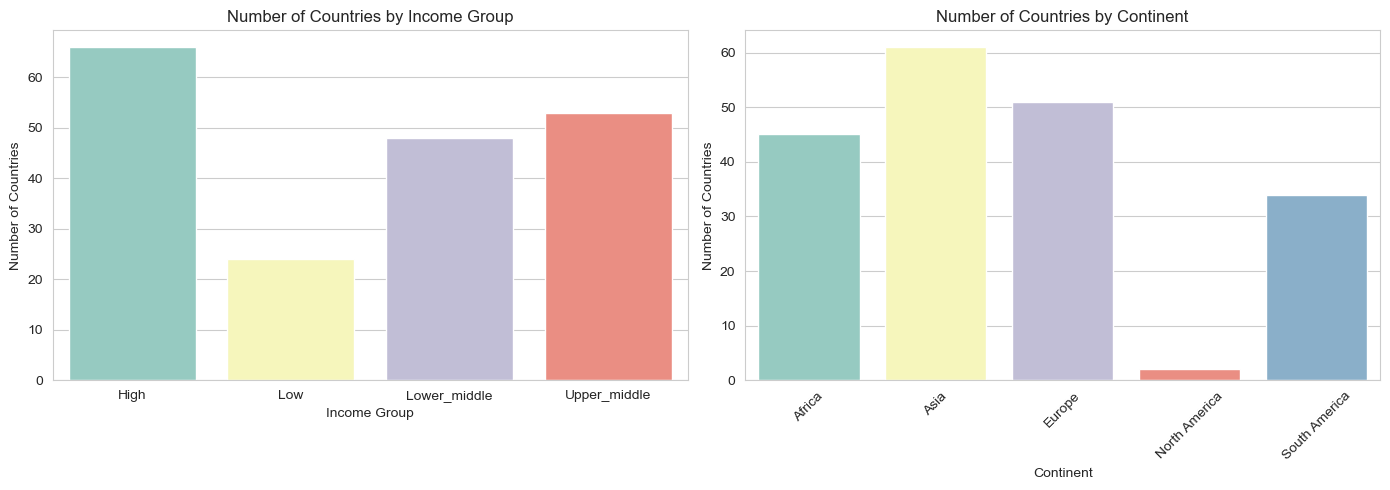

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Set seaborn style for nicer colors
sns.set_style("whitegrid")
palette= sns.color_palette("Set3")  # different soft palette
# Income group plot
income_counts = df_filtered['income_group'].value_counts()
sns.barplot(x=income_counts.index, y=income_counts.values, ax=axes[0], palette=palette)
axes[0].set_title('Number of Countries by Income Group', fontsize=12)
axes[0].set_xlabel('Income Group')
axes[0].set_ylabel('Number of Countries')

# Continent plot
continent_counts = df_filtered['continent'].value_counts()
sns.barplot(x=continent_counts.index, y=continent_counts.values, ax=axes[1], palette=palette)
axes[1].set_title('Number of Countries by Continent', fontsize=12)
axes[1].set_xlabel('Continent')
axes[1].set_ylabel('Number of Countries')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [83]:
#continue some visualizations

#### Anova

check assumptions
- Independent samples
- Equal sample sizes of groups → Type 3 Anova if not equal
- Equal variances of groups
- Normal distribution of the dependent variable → log-transform if needed
- Normal distribution of residuals

##### Environmental sustainability
Question:
- Does CO2 emission per capita differ across income groups?

Variables:
- DV (dependent variable) → co2_emissions

- IV (independent variable / factor) → income_group

In [84]:
df_co2 = df_filtered[['country', 'income_group', 'co2_emisions','population']].copy()
df_co2.head()

,country,income_group,co2_emisions,population
0,Afghanistan,Low,10317.3020,35697881.4
1,Albania,Upper_middle,5016.6600,2870165.6
2,Algeria,Upper_middle,160749.6400,41130280.8
3,Andorra,High,474.8544,73895.8
4,Angola,Lower_middle,26850.9400,30223643.2


In [85]:
print(df_co2['co2_emisions'].isna().sum())
#Impute missing values by the mean of their income group
df_co2['co2_emisions'] = df_co2.groupby('income_group')['co2_emisions'].transform(
    lambda x: x.fillna(x.mean())
)
#Verify no missing values remain
print(df_co2['co2_emisions'].isna().sum())

8
2


C:\Users\ahmed\AppData\Local\Temp\ipykernel_28732\2478844037.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_co2['co2_emisions'] = df_co2.groupby('income_group')['co2_emisions'].transform(


In [86]:
#drop the 2 missing values
df_co2 = df_co2.dropna(subset=['co2_emisions'])
print(df_co2['co2_emisions'].isna().sum())

0


In [87]:
##### Environmental sustainability
# 1-We have independent samples as each country's data is independent of others.
# 2- Sample sizes of groups are not equal, so we will use Type 3 Anova.
df_co2['income_group'].value_counts()

income_group
High            66
Upper_middle    53
Lower_middle    48
Low             24
Name: count, dtype: int64

In [88]:
df_co2['co2_emisions_log']=np.log(df_co2['co2_emisions']+1)

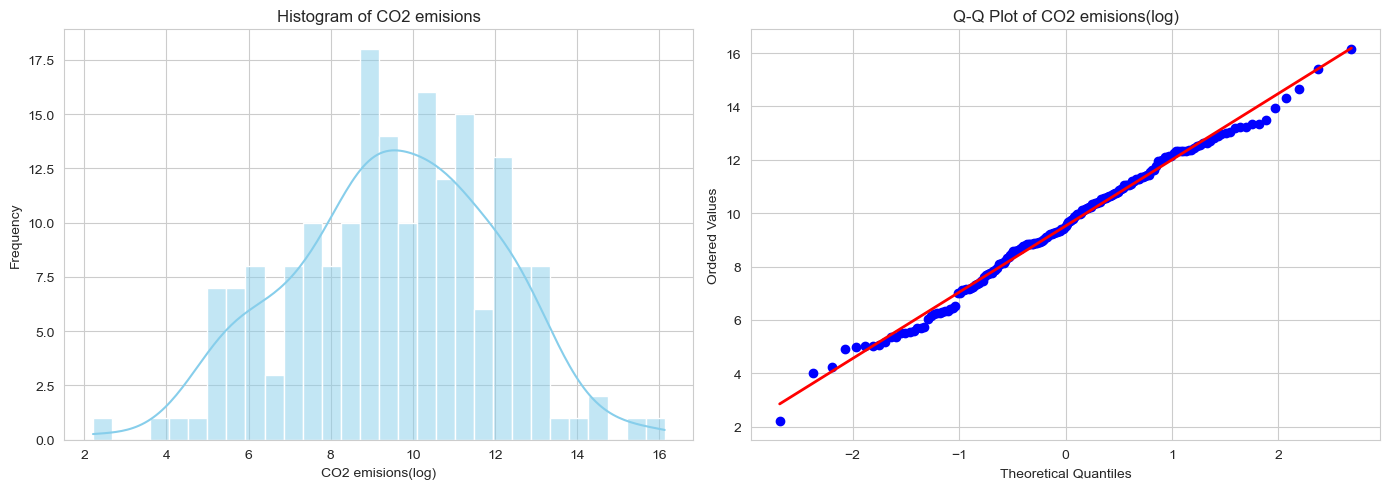

In [89]:
# 4-Normal distribution of the dependent variable
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with KDE
sns.histplot(df_co2['co2_emisions_log'], kde=True, bins=30, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of CO2 emisions')
axes[0].set_xlabel('CO2 emisions(log)')
axes[0].set_ylabel('Frequency')

# Q-Q plot
osm, osr = stats.probplot(df_co2['co2_emisions_log'])[0]  # ordered stats
slope, intercept, r_value, p_value, std_err = stats.linregress(osm, osr)  
axes[1].scatter(osm, osr, color='blue')  # data points
axes[1].plot(osm, intercept + slope*osm, color='red', lw=2)  # reference line
axes[1].set_title('Q-Q Plot of CO2 emisions(log)')
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Ordered Values')

plt.tight_layout()
plt.show()


In [90]:
# Shapiro-Wilk test
stat, p = stats.shapiro(np.log(df_co2['co2_emisions']))
print(f'Statistics={stat:.3f}, p={p:.3f}')

if p > 0.05:
    print("Residuals look Gaussian (fail to reject H0)")
else:
    print("Residuals do NOT look Gaussian (reject H0)")

Statistics=0.993, p=0.469
Residuals look Gaussian (fail to reject H0)


C:\Users\ahmed\AppData\Local\Temp\ipykernel_28732\751502321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income_group', y='co2_emisions_log', data=df_co2,


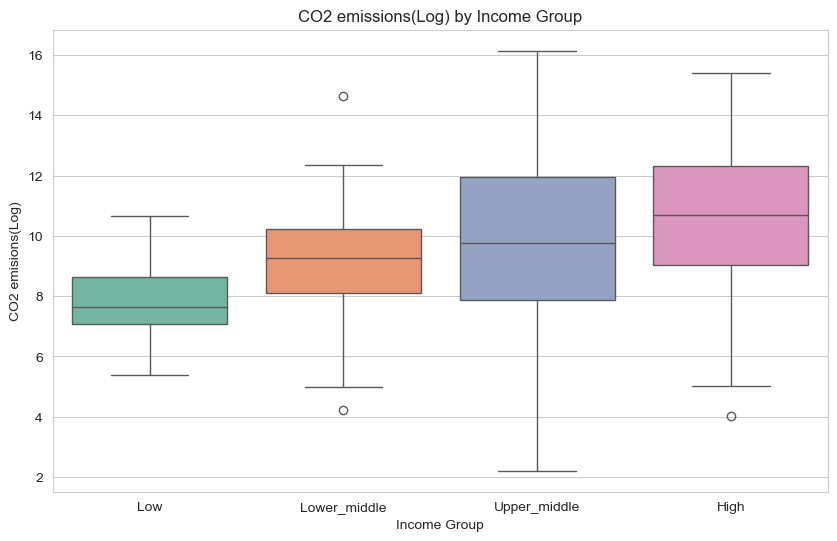

In [91]:
# 4-Equal variances of groups
# Boxplot to visualize variance per income group
plt.figure(figsize=(10,6))
sns.boxplot(x='income_group', y='co2_emisions_log', data=df_co2,
            order=['Low', 'Lower_middle', 'Upper_middle', 'High'],
            palette='Set2')
plt.title('CO2 emissions(Log) by Income Group')
plt.xlabel('Income Group')
plt.ylabel('CO2 emisions(Log)')
plt.show()

In [92]:
# Fit ANOVA model
model = ols('co2_emisions_log ~ C(income_group)', data=df_co2).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
print("ANOVA Table:")
print(anova_table)

ANOVA Table:
                      sum_sq     df            F        PR(>F)
Intercept        7130.949669    1.0  1290.263974  7.368061e-86
C(income_group)   124.502405    3.0     7.509097  9.004996e-05
Residual         1033.499822  187.0          NaN           NaN


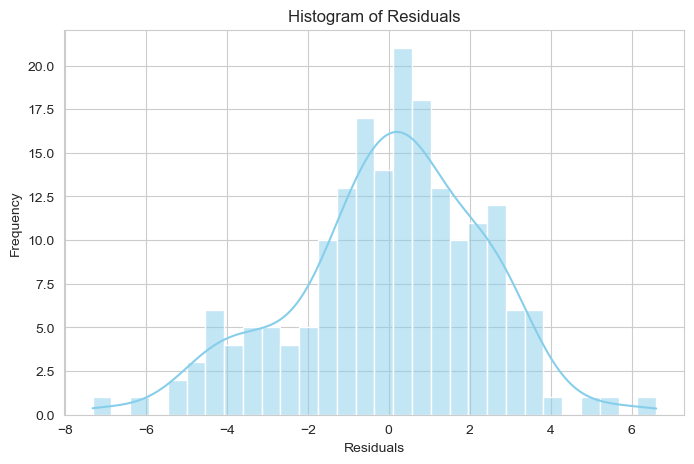

In [93]:
residuals = model.resid

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color='skyblue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [94]:
# Extract the sum of squares for the model (all rows except 'Residual')
SS_model = anova_table.loc[anova_table.index != 'Residual', 'sum_sq'].sum()
# Extract sum of squares for the residual
SS_residual = anova_table.loc['Residual', 'sum_sq']
# Total sum of squares
SS_total = SS_model + SS_residual

# Explained variance (eta-squared)
explained_variance = SS_model / SS_total

print(f'Explained Variance (η²): {explained_variance:.3f}')

Explained Variance (η²): 0.875


In [95]:
# Tukey HSD post-hoc test
tukey = pairwise_tukeyhsd(
    endog = df_co2['co2_emisions_log'],      # your dependent variable
    groups = df_co2['income_group'],           # your factor
    alpha = 0.05
)

print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
        High          Low  -2.5464 0.0001  -3.999 -1.0937   True
        High Lower_middle  -1.2547 0.0276 -2.4108 -0.0987   True
        High Upper_middle  -0.8644 0.1941 -1.9885  0.2596  False
         Low Lower_middle   1.2917 0.1276 -0.2319  2.8152  False
         Low Upper_middle    1.682 0.0211  0.1826  3.1814   True
Lower_middle Upper_middle   0.3903 0.8386  -0.824  1.6046  False
----------------------------------------------------------------


Income group has a very strong effect on CO₂ emissions,and here is the results
- High-income countries emit significantly more CO₂ per capita than Low and Lower-Middle income countries.
- Upper-Middle income countries emit significantly more than Low-income countries.
- Income groups in the middle (Low ↔ Lower-Middle ↔ Upper-Middle) do NOT differ much.
- Upper-Middle countries are surprisingly close to High-income countries (no significant difference).

##### Governance and institutional quality

##### Economic performance

##### Human well-being and health